### <CENTER> BRAZILIAN CORN PROJECT


### 
THIS IS A REGRESSION KIND OF PROBLEM IN WHICH WE HAVE TO PREDICT THE HIGHEST PRICE OF CORN


### DATASET DESCRIPTION

#### 
This dataset contains Historical Data extracted from Investing.com and it contains Close,Open,High,Low,Volume,Returns these coloumns


source:https://www.kaggle.com/datasets/lusfernandotorres/brazilian-corn-futures kaggle

### importing liabraires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
import klib as k

In [2]:
df=pd.read_csv("Brazilian Corn Futures.csv")


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2274 non-null   object 
 1   Close    2274 non-null   float64
 2   Open     2274 non-null   float64
 3   High     2274 non-null   float64
 4   Low      2274 non-null   float64
 5   Volume   2141 non-null   float64
 6   Returns  2274 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.5+ KB


In [4]:
df.isnull().sum()

Date         0
Close        0
Open         0
High         0
Low          0
Volume     133
Returns      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(2274, 7)

In [7]:
df.describe()

,Close,Open,High,Low,Volume,Returns
count,2274.000000,2274.000000,2274.000000,2274.00000,2141.000000,2274.000000
mean,50.633716,50.627208,50.949006,50.31478,2623.316207,0.063593
std,24.761166,24.770846,24.828627,24.72375,2802.445415,1.580751
min,21.560000,21.520000,21.780000,21.51000,0.000000,-14.510000
25%,31.997500,31.985000,32.275000,31.69750,700.000000,-0.700000
50%,40.400000,40.365000,40.750000,40.01500,1800.000000,0.010000
75%,78.837500,78.782500,80.262500,78.00750,3570.000000,0.780000
max,106.920000,107.060000,107.200000,107.01000,25190.000000,14.800000


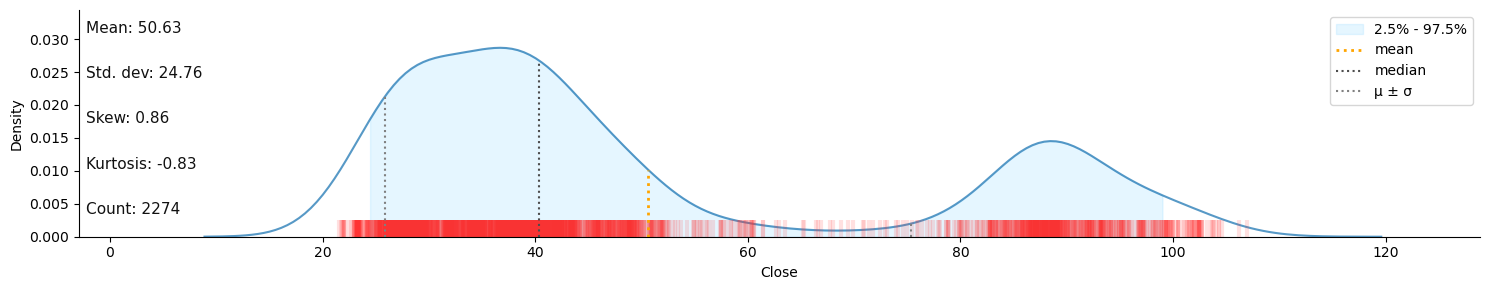

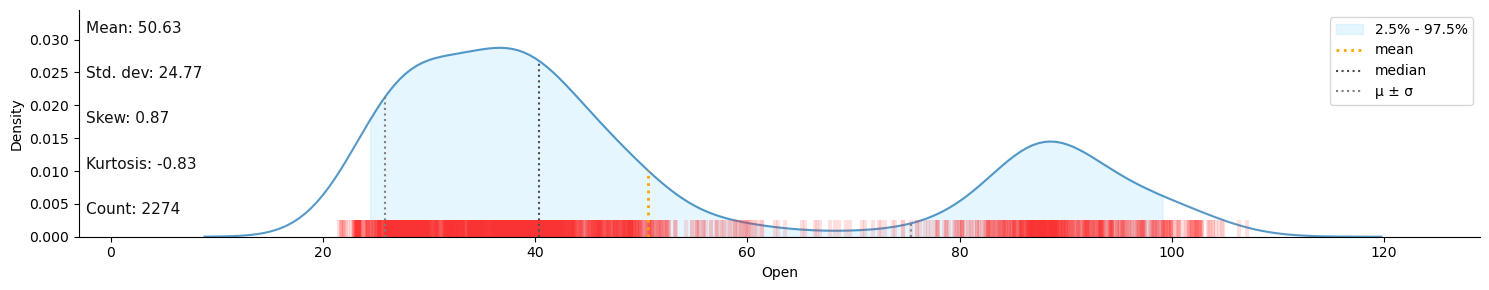

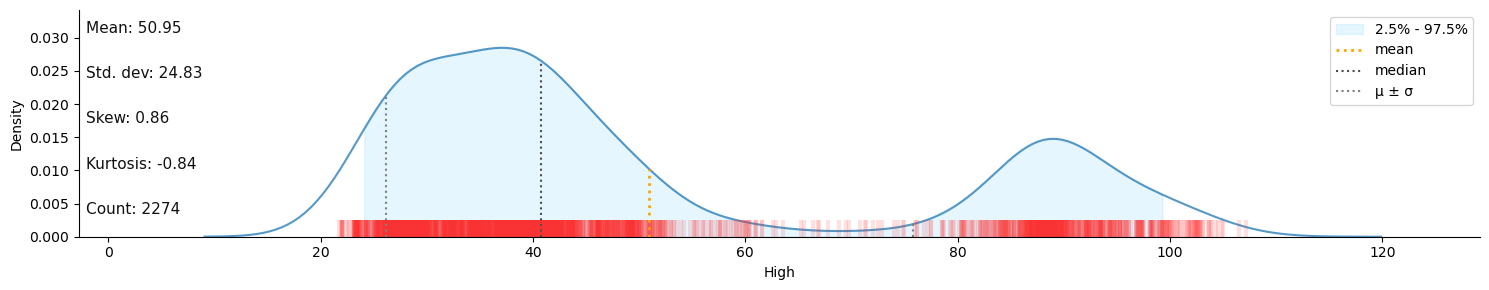

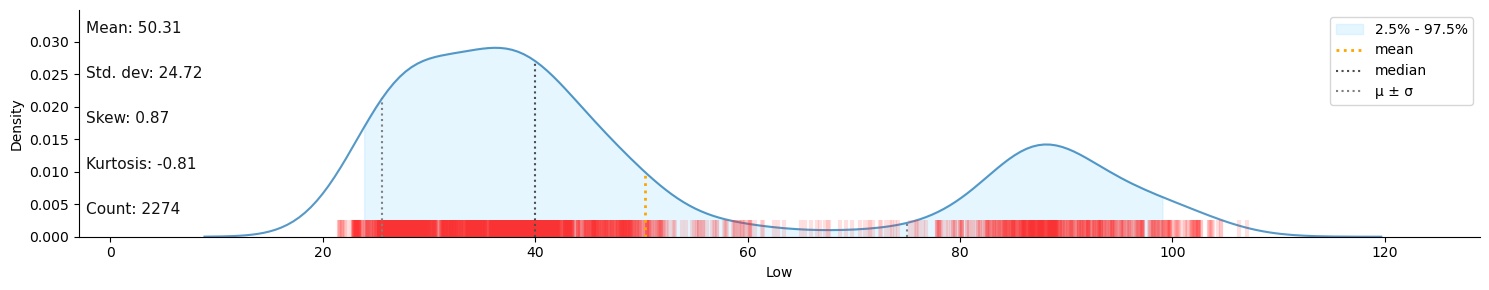

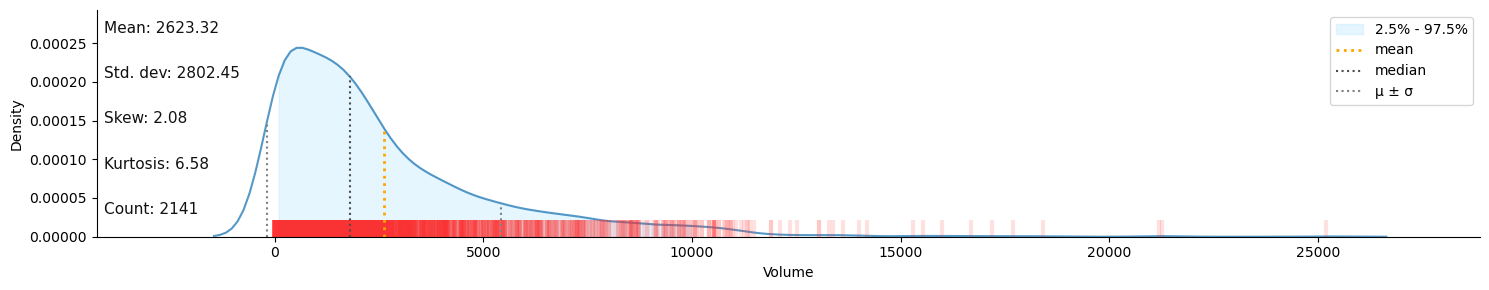

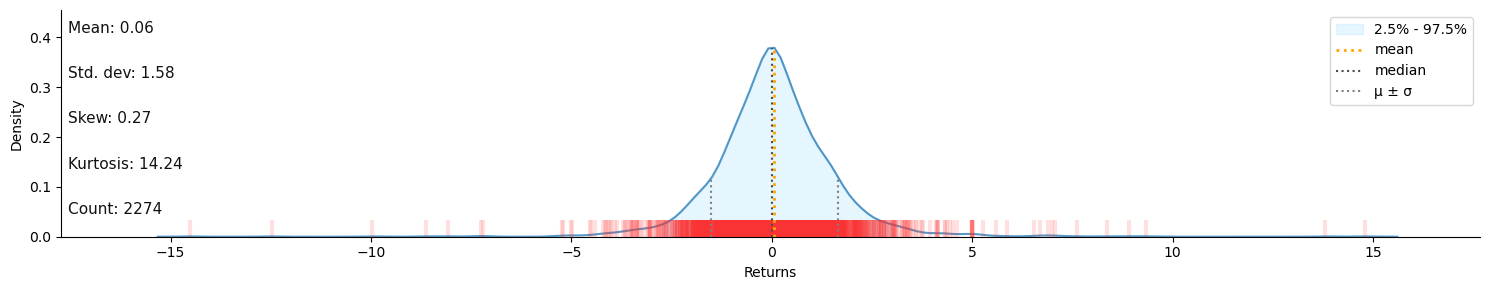

In [8]:
k.dist_plot(df);

In [10]:
df.High.unique()

array([27.35, 27.75, 28.37, ..., 88.4 , 87.27, 87.53])

In [11]:
k.corr_mat(df)

,Close,Open,High,Low,Volume,Returns
Close,1.00,1.00,1.00,1.00,0.58,0.02
Open,1.00,1.00,1.00,1.00,0.59,0.00
High,1.00,1.00,1.00,1.00,0.59,0.01
Low,1.00,1.00,1.00,1.00,0.58,0.01
Volume,0.58,0.59,0.59,0.58,1.00,-0.02
Returns,0.02,0.00,0.01,0.01,-0.02,1.00


In [12]:
k.clean_column_names(df)

,date,close,open,high,low,volume,returns
0,2014-01-02,27.29,27.25,27.35,27.02,580.0,0.11
1,2014-01-03,27.71,27.30,27.75,27.30,670.0,1.54
2,2014-01-06,28.20,27.72,28.37,27.70,1230.0,1.77
3,2014-01-07,27.67,28.16,28.27,27.60,810.0,-1.88
4,2014-01-08,27.35,27.65,27.79,27.25,830.0,-1.16
...,...,...,...,...,...,...,...
2269,2023-02-27,87.24,87.82,87.90,87.11,7780.0,-0.57
2270,2023-02-28,87.29,87.20,87.70,87.07,4050.0,0.06
2271,2023-03-01,86.75,87.20,87.27,86.62,140.0,-0.62
2272,2023-03-02,87.20,86.86,87.35,86.83,80.0,0.52


In [13]:
k.cat_plot(df)

GridSpec(6, 1)

In [14]:
le=LabelEncoder()

In [15]:
df["date"]=le.fit_transform(df.date)

### BOX PLOT

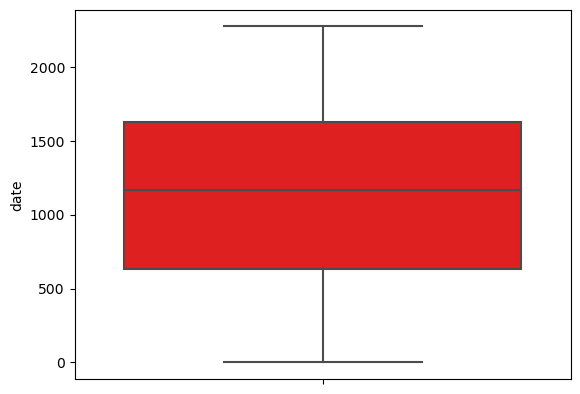

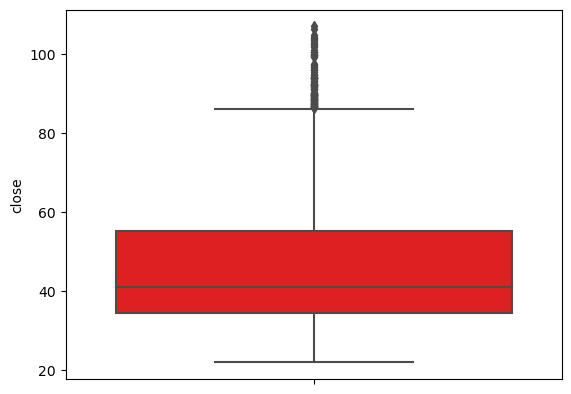

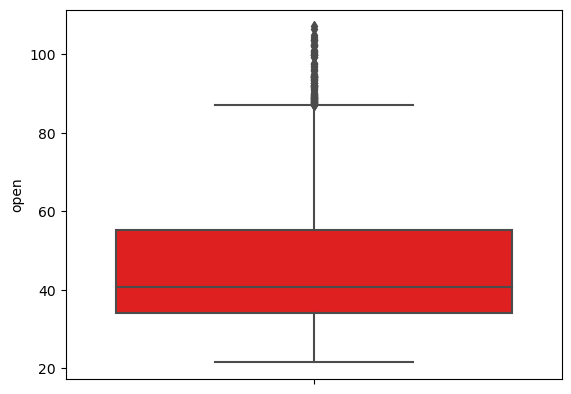

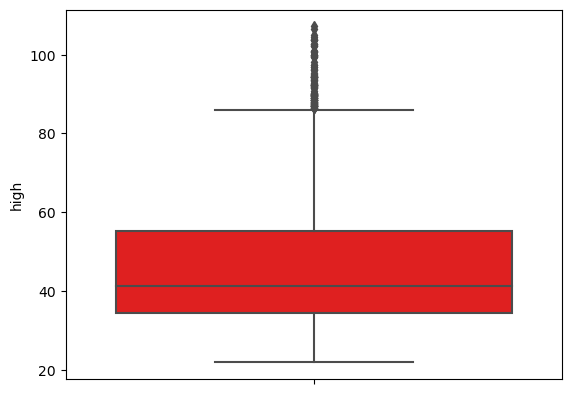

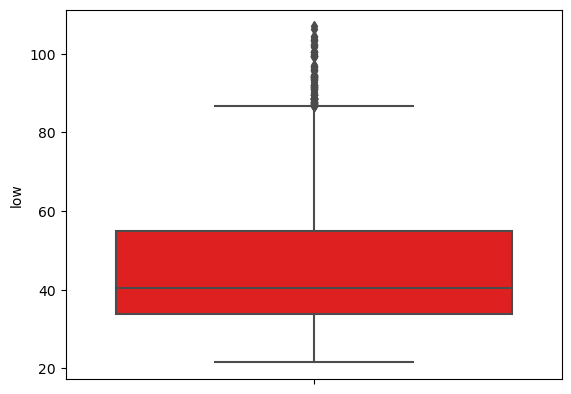

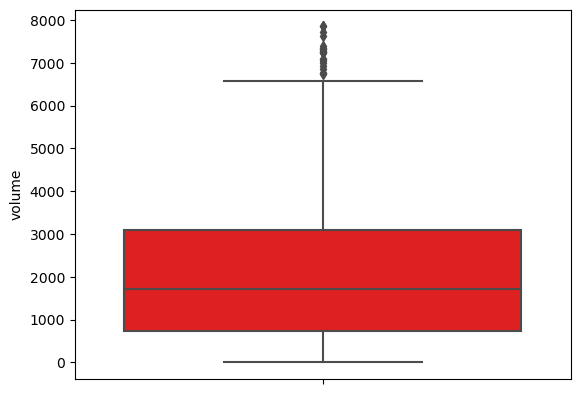

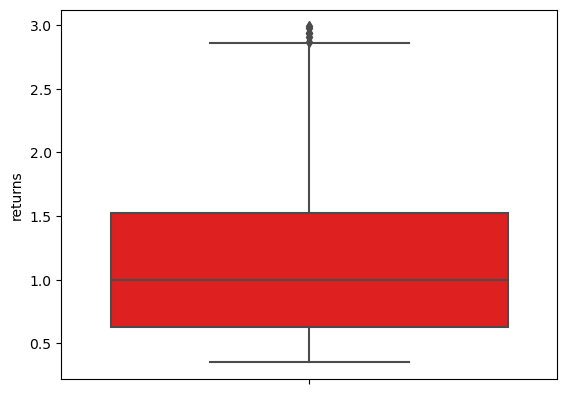

In [40]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()


### REMOVING OUTLAIR

In [17]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL


for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

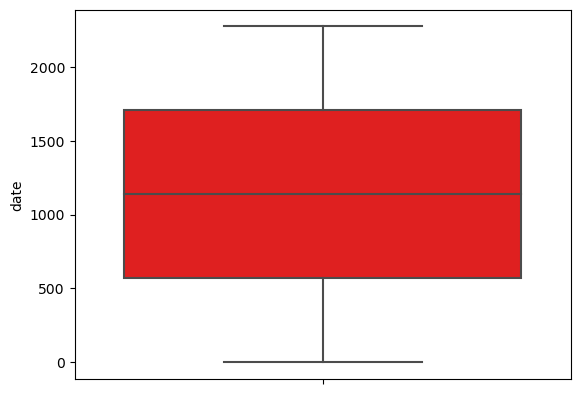

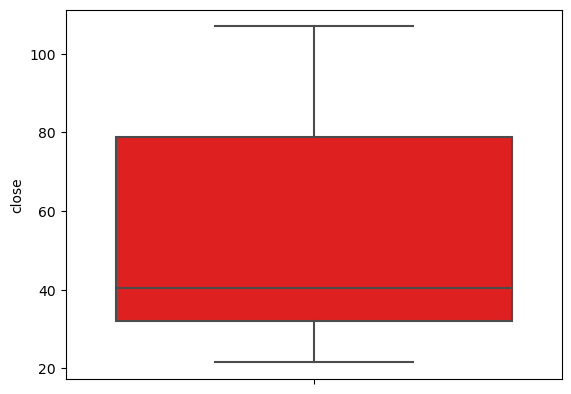

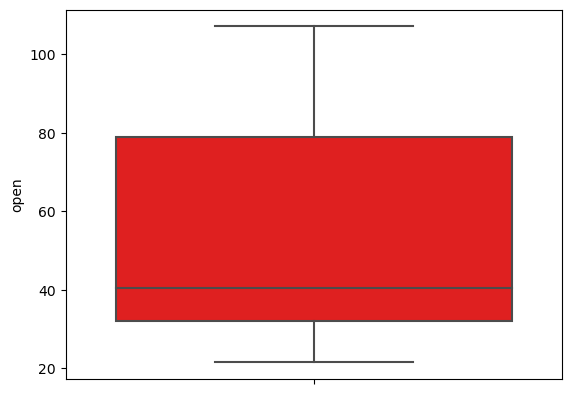

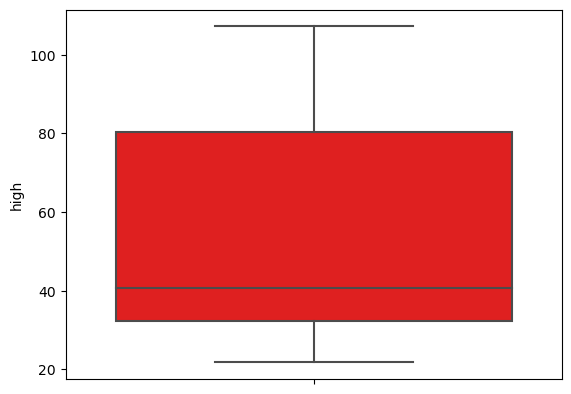

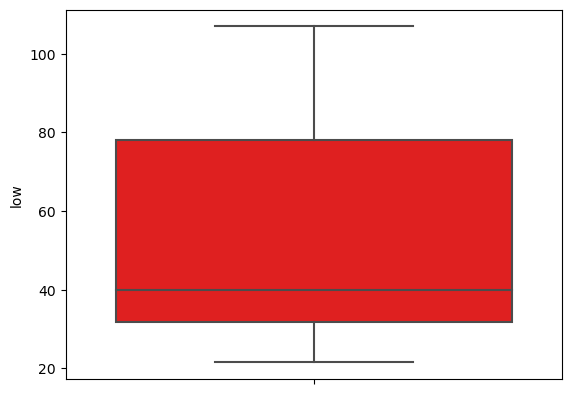

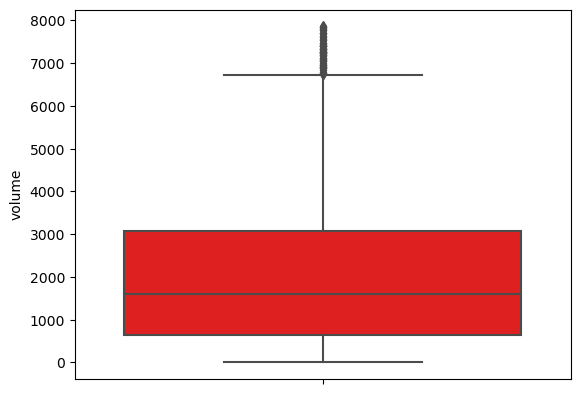

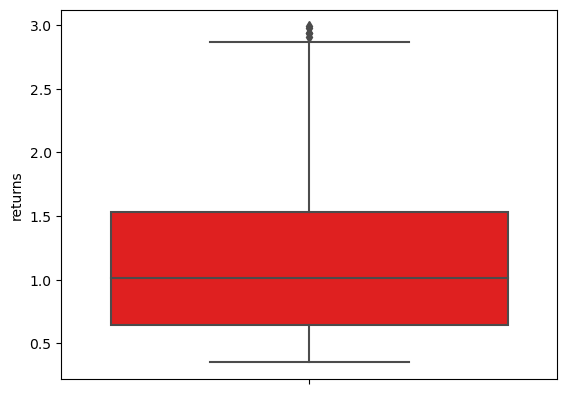

In [18]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()


In [19]:
df.isnull().sum()

date          0
close         0
open          0
high          0
low           0
volume      265
returns    1482
dtype: int64

In [20]:
df.dropna(inplace=True)

### HEATMAP

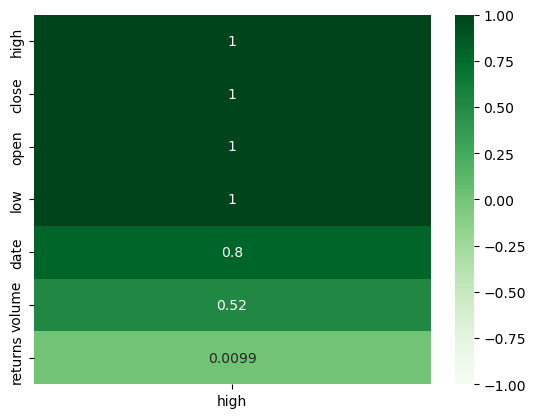

In [21]:
sns.heatmap(df.corr()[["high"]].sort_values(by="high", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");
plt.show();

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 2272
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     724 non-null    float64
 1   close    724 non-null    float64
 2   open     724 non-null    float64
 3   high     724 non-null    float64
 4   low      724 non-null    float64
 5   volume   724 non-null    float64
 6   returns  724 non-null    float64
dtypes: float64(7)
memory usage: 45.2 KB


### KDE PLOT

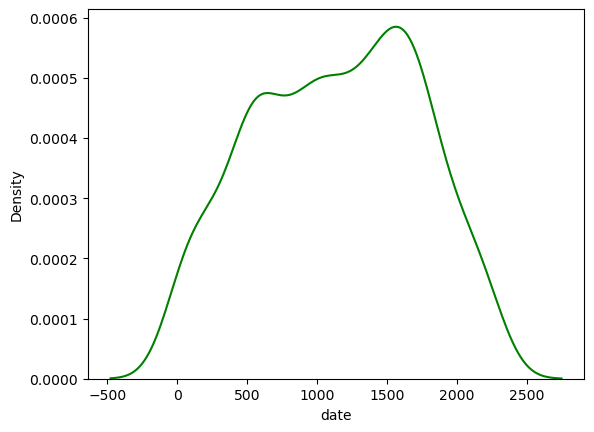

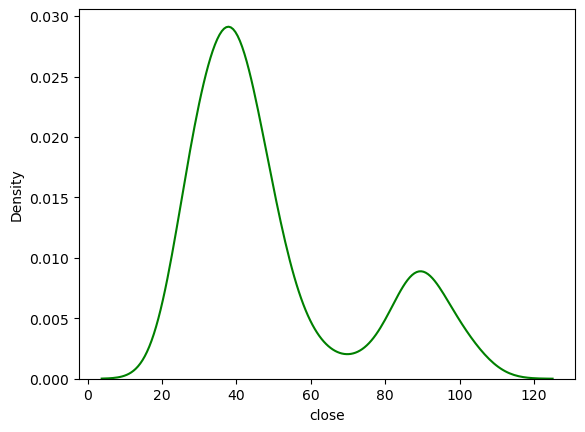

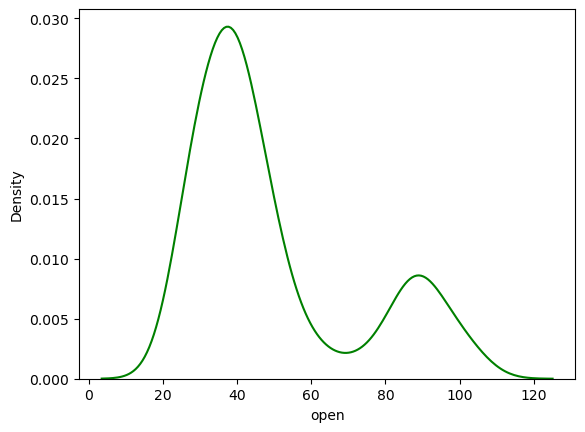

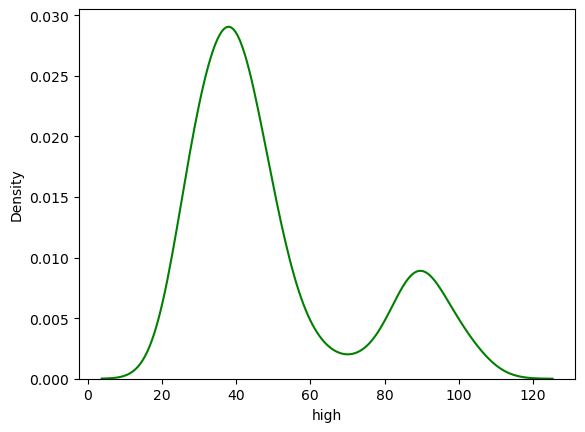

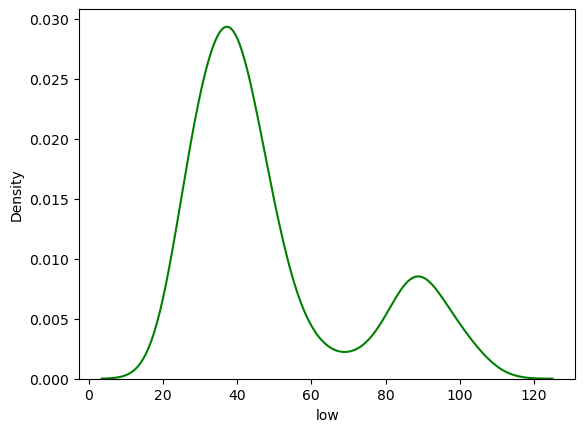

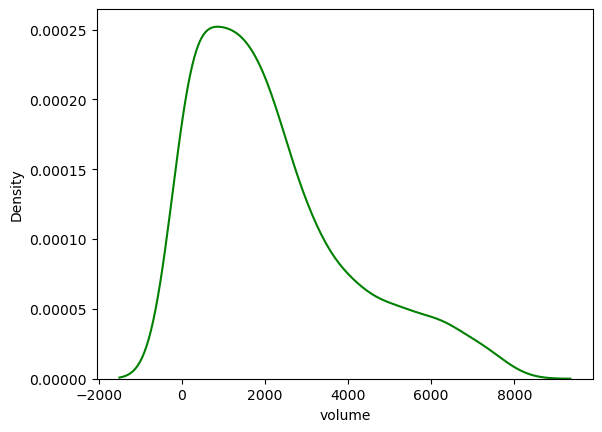

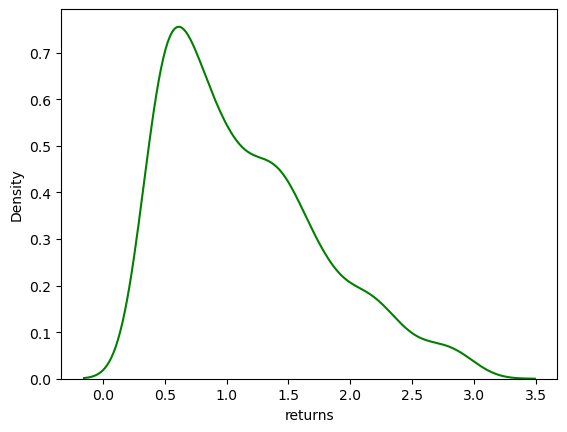

In [23]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(x=df[i],color="GREEN")
        plt.show();

### HISTOGRAM

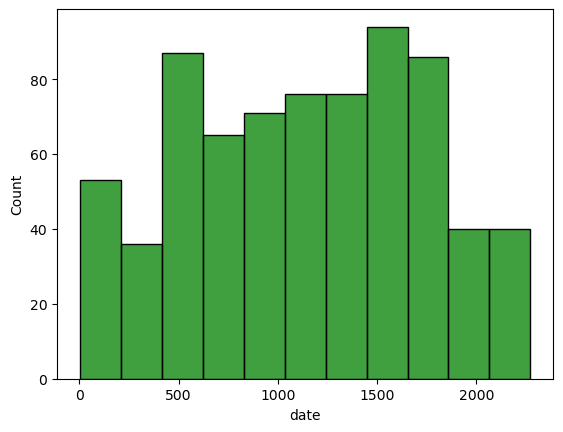

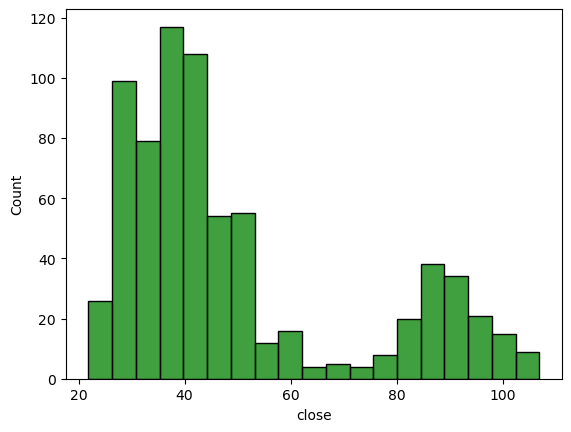

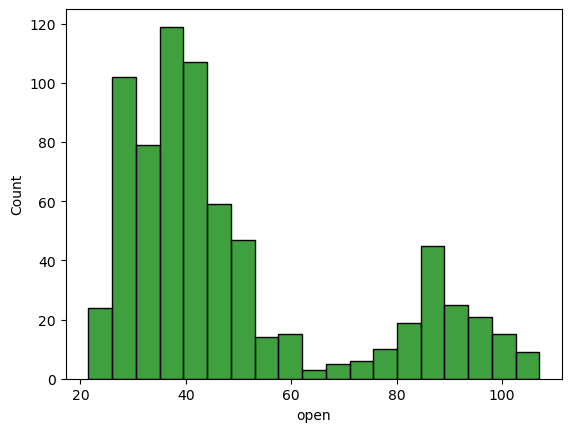

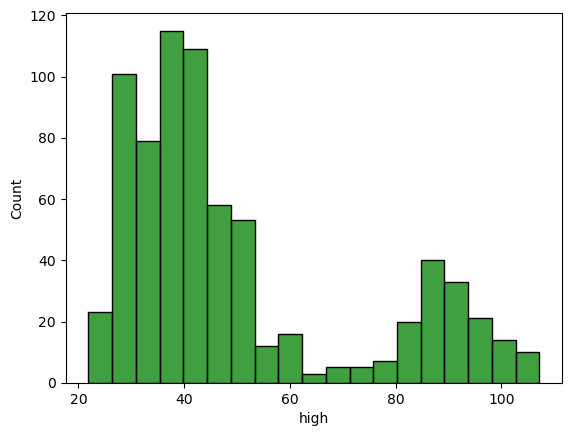

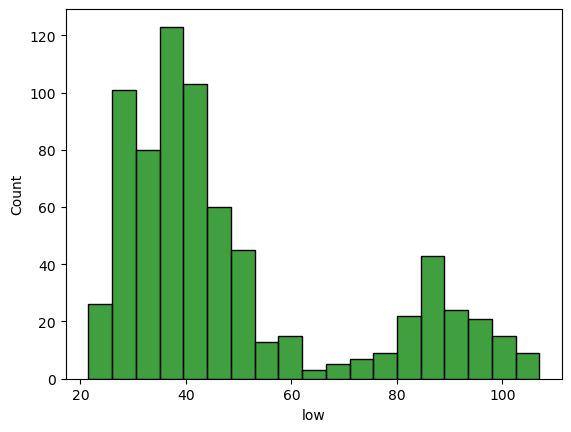

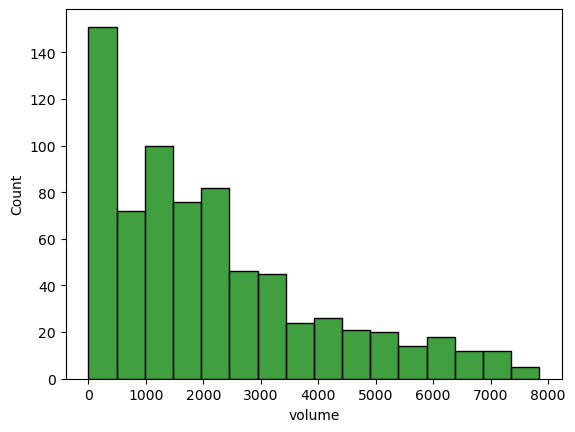

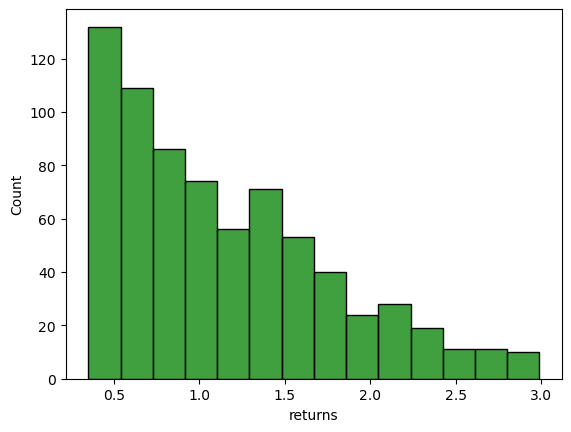

In [24]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i],color="GREEN")
        plt.show();

### BAR PLOT

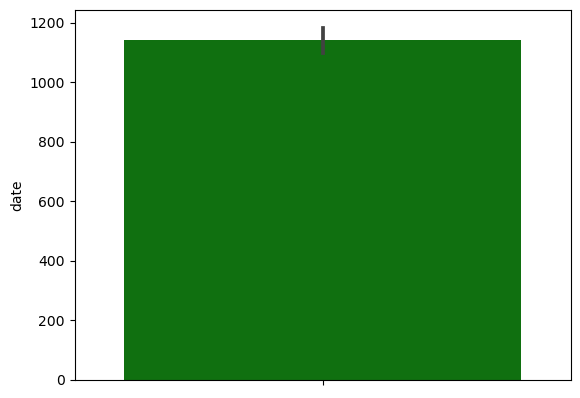

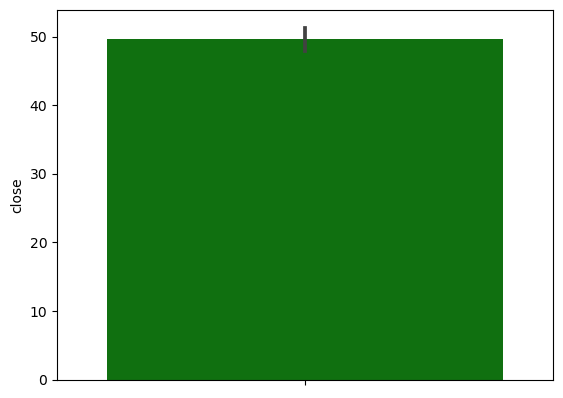

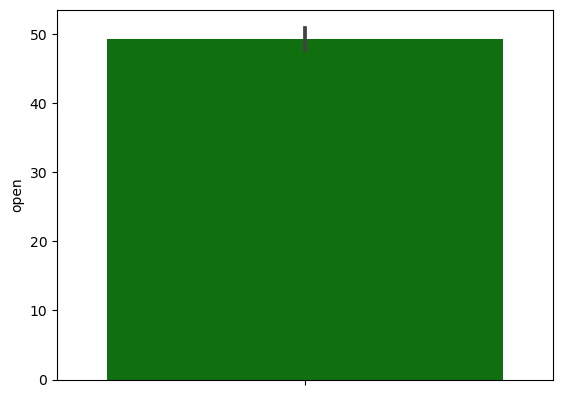

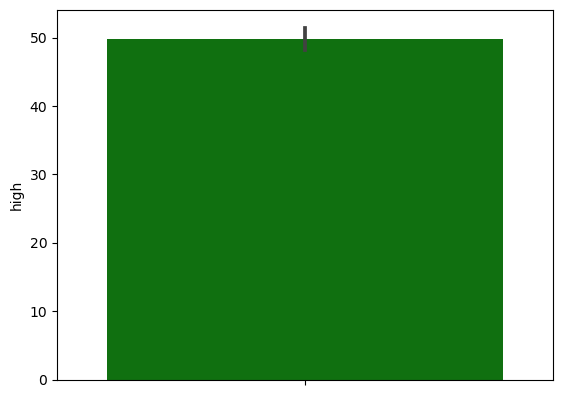

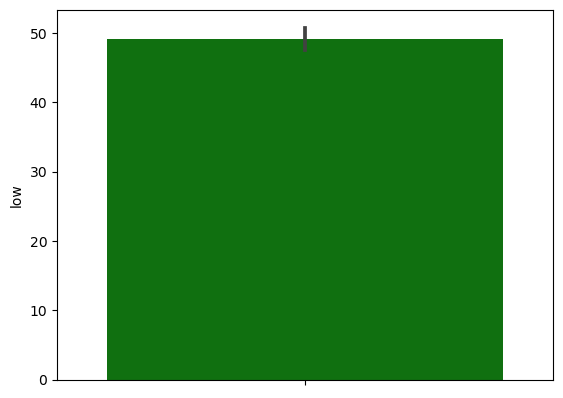

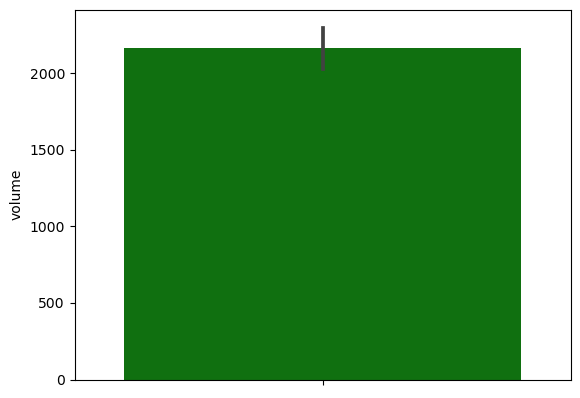

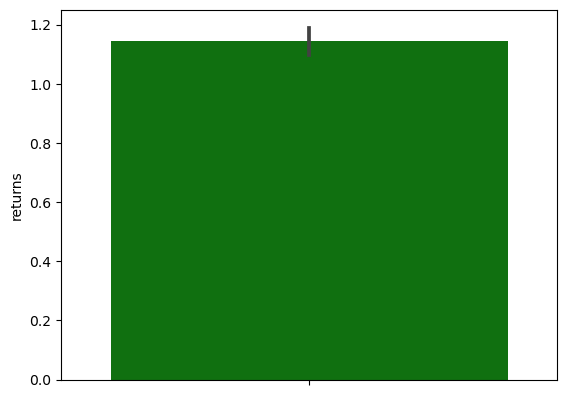

In [25]:
for i in df.columns:
    if df[i].dtype!="object":
            sns.barplot(y=df[i],color="green")
            plt.show();

### REGRESSION

In [26]:
x=df[["date","close","open","low","volume"]].values
y=df[["high"]].values

In [27]:
sc=StandardScaler()

In [28]:
x=sc.fit_transform(x)

### CROSS VALIDATION

In [29]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [30]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.17756163979536047
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  1.1041789720211277
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.2883992805807973
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.9015063121728067
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.0687528996102613
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.6309000797659148
*********************************************

### MODEL TRAINING

In [31]:
ls=Lasso()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
ls.fit(x_train, y_train)

Lasso()

In [34]:
print("model trained with {}".format(ls))
training_score = ls.score(x_train, y_train)*100
testing_score = ls.score(x_test, y_test)*100
score = r2_score(y_test, ls.predict(x_test))*100
mae = mean_absolute_error(y_test, ls.predict(x_test))
mse = mean_squared_error(y_test, ls.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Lasso()
r2score:  99.78487025972535
training_score:  99.79166094587352
testing_score:  99.78487025972535
mae:  0.847007994126421
mse:  1.1224748266058158
rmse_test:  1.0594691248950183


In [35]:
y_pred = ls.predict(x)

In [36]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,27.75,28.823058
1,28.37,29.291805
2,27.00,28.143879
3,27.15,28.268247
4,27.33,28.450012
...,...,...
719,87.68,86.107361
720,88.99,87.427345
721,89.49,87.838892
722,88.90,87.293543


In [37]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,27.75,28.823058
1,28.37,29.291805
2,27.00,28.143879
3,27.15,28.268247
4,27.33,28.450012
...,...,...
719,87.68,86.107361
720,88.99,87.427345
721,89.49,87.838892
722,88.90,87.293543


### SCATTER PLOT

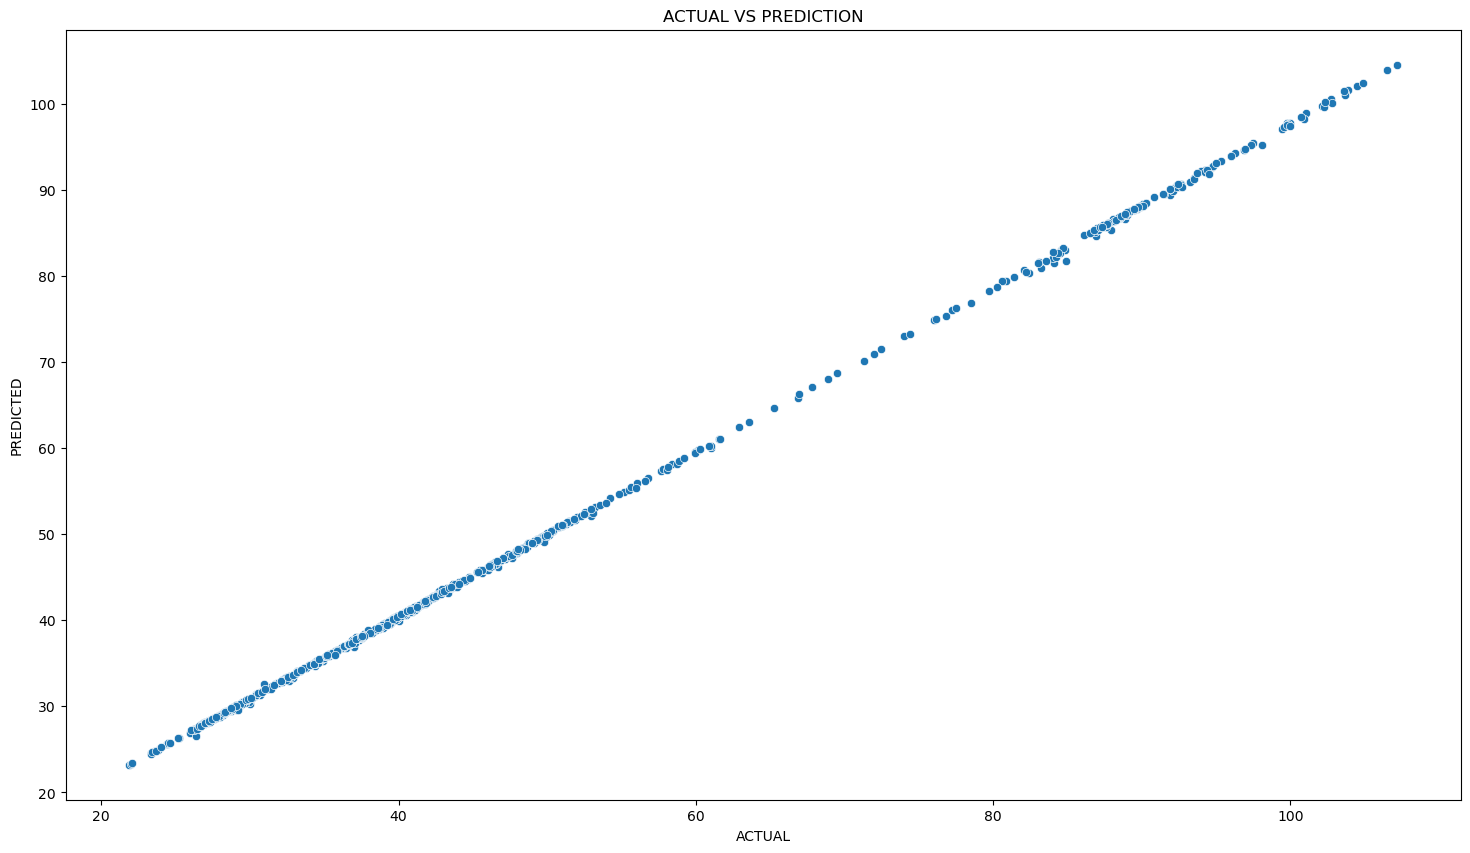

In [38]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

### LINE PLOT

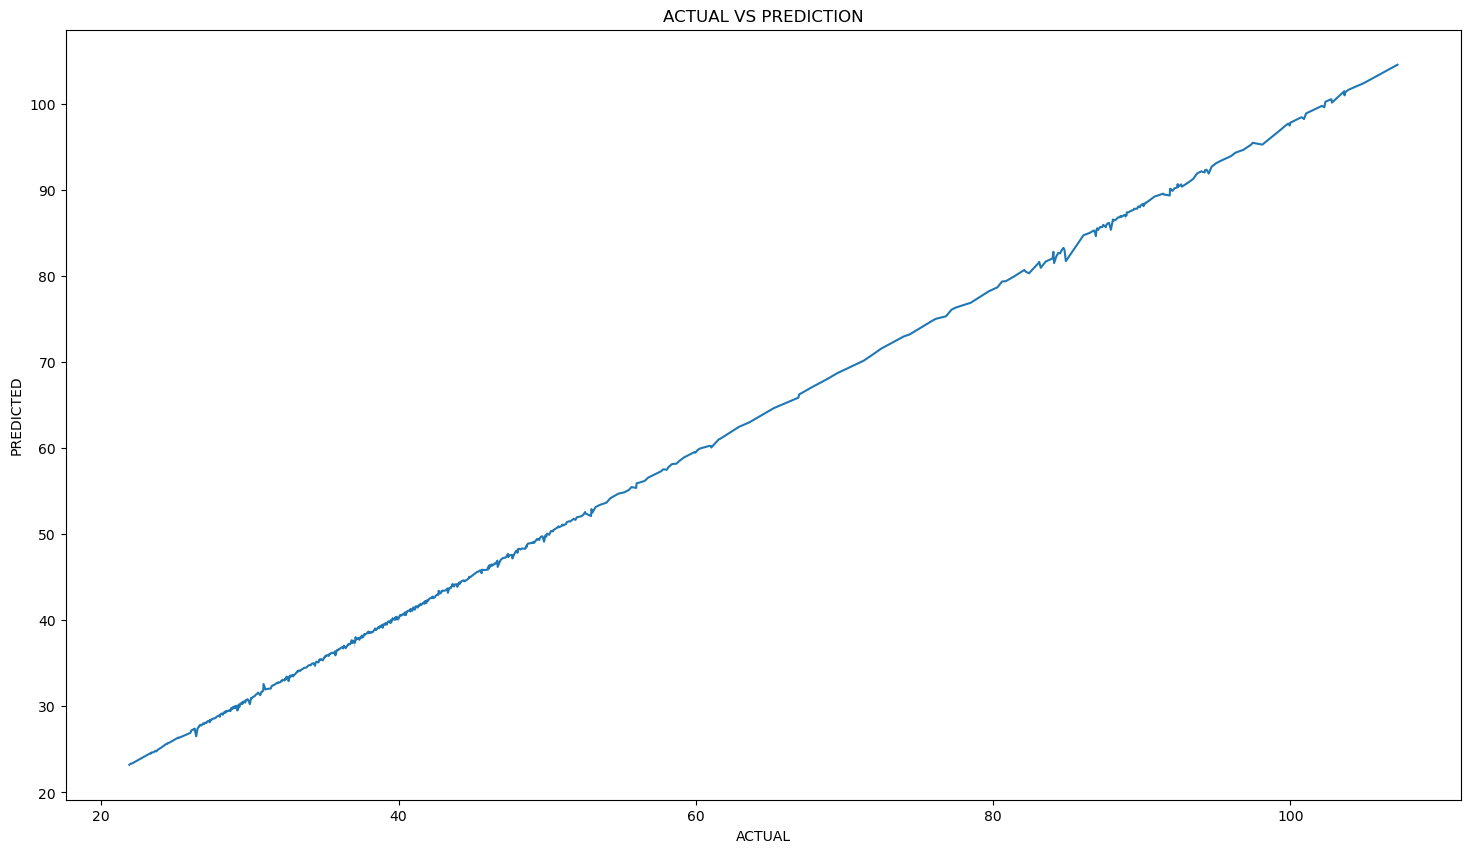

In [39]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

### CONCLUTION

###  
OUR PREDICTED VALUE IS 99% ACCURATE WITH ACTUAL VALUE BY USING LASSO REGRESSION
